(60000, 784)	(10000, 784)
(60000,)	(10000,)


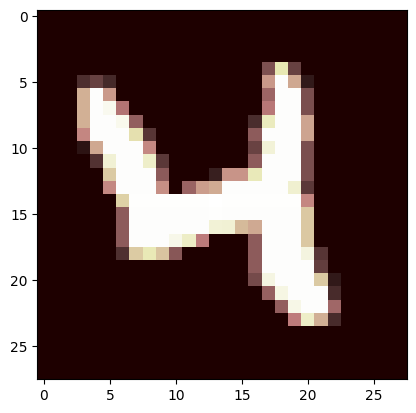

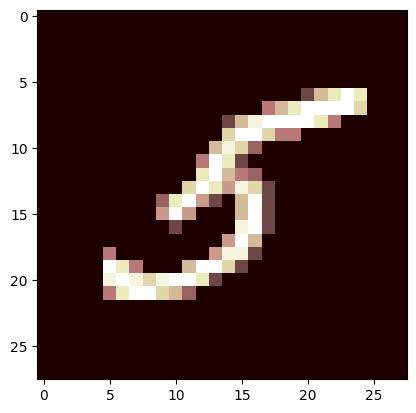

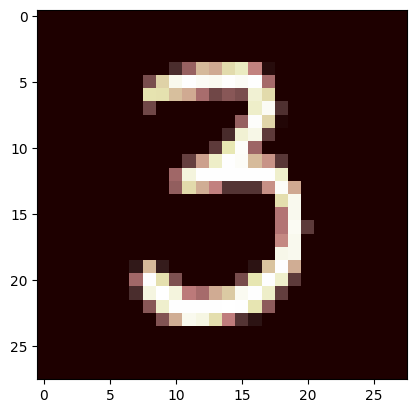

 The Accuracy is :  0.9691
 The Accuracy is:  0.9691


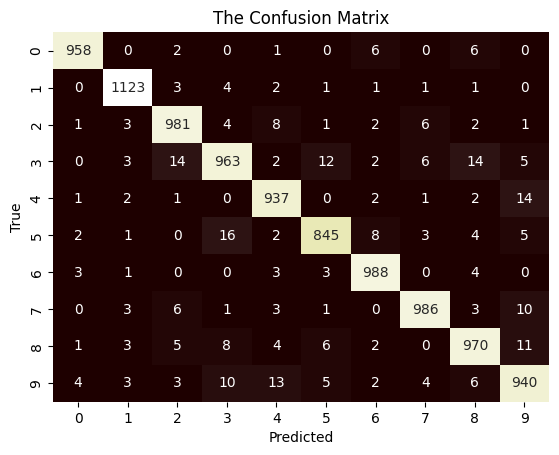

Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  14.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  15.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  29.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  28.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=  14.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=  14.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=  28.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=  29.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  14.3s
[CV] END max_dep

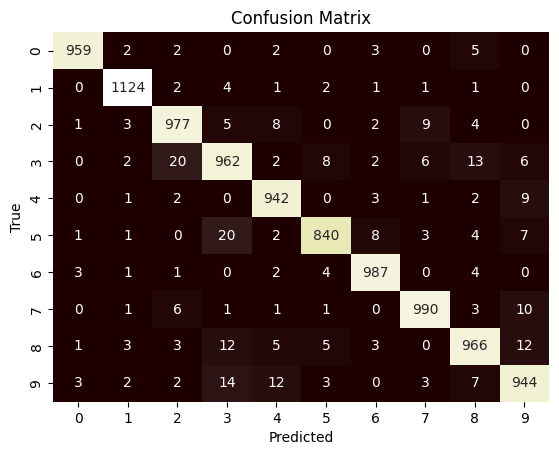

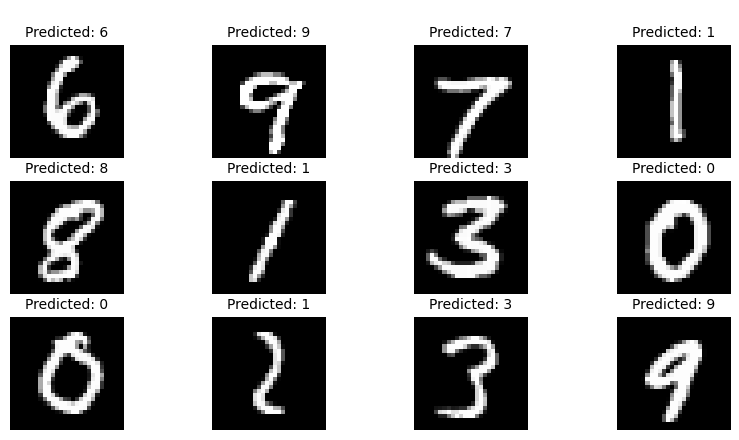

In [ ]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For visualizing data

# Enables inline plotting in Jupyter notebooks
%matplotlib inline

# Importing machine learning tools from scikit-learn
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV  # For model tuning and data splitting
from sklearn.metrics import confusion_matrix, accuracy_score  # For evaluating model performance
from sklearn.ensemble import RandomForestClassifier  # The model used for classification
from sklearn.preprocessing import MinMaxScaler  # For scaling data to a consistent range

# Loading the MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Fetches keys from the dataset for exploration
mnist.keys()

# Separating features (X) and labels (y) from the dataset
X, y = mnist["data"], mnist["target"]  # X contains pixel values, y contains digit labels

# Splitting the dataset into training  and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7.0)

# Displaying the shapes of train and test data for verification
print(X_train.shape, X_test.shape, sep="\t")
print(y_train.shape, y_test.shape, sep="\t")

# Function to visualize sample images from the dataset
def visualise(index):
    pixels = pd.DataFrame(mnist.data)  # Extracts pixel values as DataFrame
    labels = pd.DataFrame(mnist.target)  # Extracts labels as DataFrame
    label = labels.loc[index]  # Gets the label for the specified index
    pixel = pixels.loc[index]  # Gets the pixel data for the specified index
    pixel = np.array(pixel, dtype='uint8')  # Converts to an 8-bit array
    pixel = pixel.reshape((28, 28))  # Reshapes to a 28x28 array (image dimensions)
    plt.imshow(pixel, cmap='pink')  # Displays the image with pink colormap
    plt.show()

# Visualizing samples from the dataset
visualise(20)
visualise(35)
visualise(50)

# Scaling pixel values to range [0, 1] for model compatibility
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)  # Fits and transforms training data
X_test = scaler.transform(X_test)  # Transforms test data using the same scaling

# Initializing and fitting a Random Forest Classifier on training data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Displaying the accuracy of the initial model
print("The Accuracy is:", model.score(X_test, y_test))  # Method 1
print("The Accuracy is:", accuracy_score(y_pred, y_test))  # Method 2

# Confusion matrix for model evaluation
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="pink", cbar=False)  # Heatmap of confusion matrix
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Setting up a grid search to find the best hyperparameters for Random Forest
rf_clf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100],  # Number of trees
    'max_depth': [None, 5, 10],  # Max depth of each tree
    'min_samples_split': [2, 3, 5],  # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 3],  # Min samples for each leaf node
}

# Performing grid search with cross-validation to find best hyperparameters
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=2, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Extracting the best parameters and estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Making predictions on test data using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculating and printing the accuracy on the test set with optimized model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy on Test Set: {accuracy}")

# Plotting the confusion matrix for the optimized model
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot=True, fmt="d", cmap="pink", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Optimized Model Confusion Matrix')
plt.show()

# Randomly selecting a few test images to display predictions
import random
random_indices = random.sample(range(len(X_test)), 12)
sample_images = X_test[random_indices]
sample_labels = y_pred[random_indices]

# Predicting labels for selected test images
sample_predictions = model.predict(sample_images)

# Plotting the selected images along with their predictions
plt.figure(figsize=(10, 5))
for i in range(len(sample_images)):
    plt.subplot(3, 4, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"\nPredicted: {sample_predictions[i]}", fontsize=10)
    plt.axis('off')

plt.show()


Model Challenges :

Similar-looking digits, like "3" and "5," led to misclassifications, and tuning provided minimal improvement due to the high initial accuracy,slightly reducing misclassifications but not boosting overall accuracy.

Conclusion and Effectiveness :

The model achieved reliable 96.91% accuracy. This high performance is further highlighted by the significant count of true positives in the confusion matrix, emphasizing the model's accuracy in identifying digits correctly.